In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

#### Import data & packages for cleaning

In [3]:
import pandas as pd
import string
import regex as re
from nltk.stem.lancaster import LancasterStemmer
df = pd.read_csv("Cleaned_Data.csv")

## Pre-processing data
### Use Regex & Python string library to remove numbers, special characters, capitalizations from tweets. 
#### Stemmer applied as well

In [4]:
df["Tweet"]=df.Tweet.apply(lambda x: re.sub("[^a-zA-Z:,@#'\s]+","",x))
df["Tweet"]=df["Tweet"].apply(lambda x: x.lower())
df["Tweet"] = df.Tweet.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x))
stemmer = LancasterStemmer()
df["Tweet"] = df["Tweet"].apply(lambda x: stemmer.stem(x))

### Second of 4 groups (Tweets #400_001 to #800K each)

In [5]:
tweets_800K = df["Tweet"][400_001:800_001]
tweets_800K_list = list(tweets_800K)

In [6]:
tweets_800K.head()

400001     gigisossum   my entire friggin family  there ...
400002    i absolutely lt sleeping in on saturdays i got...
400003                     is a little upset at the moment 
400004      booze and soccer  but sweden is fucking losing 
400005     nicksantino ohh harry potter i need the th an...
Name: Tweet, dtype: object

### Create stop_word list to remove unnecessary nouns
#### Repetitive nouns or words mistaken as nouns still pose a problem

In [7]:
from sklearn.feature_extraction import text

In [8]:
addl_stop_words = ["ah",
"ahh",
"ahhh",
"ahhhh",
"alot",
"amp",
"aren",
"arent",
"argh",
"ass",
"aw",
"aww",
"awww",
"awwww",
"babe",
"baby",
"bad",
"bc",
"big",
"bit",
"bitch",
"blah",
"boo",
"bout",
"boy",
"boys",
"btw",
"bye",
"cnt",
"cos",
"couldn",
"coz",
"cuz",
"da",
"dam",
"day",
"days",
"dear",
"decent",
"def",
"did",
"didn",
"didnt",
"dnt",
"doesn",
"doesn’t",
"doesnt",
"doin",
"don",
"dont",
"dude",
"feeling",
"fml",
"friday",
"fuck",
"getting",
"girl",
"girls",
"god",
"goin",
"gon",
"gonna",
"good",
"goodbye",
"goodnight",
"goood",
"gosh",
"great",
"gt",
"guess",
"gunna",
"guy",
"guys",
"ha",
"haha",
"hahaha",
"hahahaha",
"hard",
"hav",
"haven",
"havin",
"hell",
"hey",
"hi",
"hope",
"hour",
"hours",
"hrs",
"http",
"huge",
"idk",
"im",
"isn",
"isnt",
"jk",
"jus",
"just",
"kno",
"lady",
"left",
"lil",
"link",
"little",
"ll",
"lmao",
"lol",
"long",
"lot",
"lots",
"love",
"lt",
"luv",
"ma",
"making",
"man",
"monday",
"morning",
"moro",
"morrow",
"mr",
"na",
"nd",
"new",
"nice",
"night",
"nights",
"nite",
"noes",
"nope",
"oh",
"ohh",
"ok",
"okay",
"omg",
"omgosh",
"ones",
"ouch",
"ouch",
"ouch",
"ow",
"ow",
"ow",
"past",
"people",
"plz",
"pm",
"poor",
"poor",
"rd",
"ready",
"ready",
"real",
"real",
"right",
"rip",
"rip",
"saturday",
"shit",
"sleepy",
"sleepy",
"so",
"soo",
"sooo",
"soooo",
"sooooo",
"soooooo",
"sorry",
"st",
"st",
"stay",
"stuff",
"stupid",
"sucks",
"sunday",
"super",
"ta",
"terrible",
"th",
"th",
"thanks",
"thats",
"thing",
"things",
"tho",
"thursday",
"til",
"till",
"time",
"times",
"today",
"tommorow",
"tomorrow",
"tomorrow",
"tomorrow",
"tomorrow",
"tonight",
"tuesday",
"ugh",
"ughh",
"uh",
"ur",
"ve",
"vs",
"vs",
"wait",
"wan",
"wanna",
"want",
"wasn",
"way",
"wednesday",
"wee",
"week",
"weekend",
"weeks",
"wish",
"wit",
"wit",
"wont",
"wouldn",
"wouldnt",
"wow",
"xd",
"xoxo",
"xoxo",
"xx",
"ya",
"ya",
"yay",
"yea",
"yeah",
"year",
"years",
"yes",
"yesterday",
"yo",
"yr"]

In [9]:
stop_word_list = text.ENGLISH_STOP_WORDS.union(addl_stop_words)

### Reducing tweets to nouns for topic modelling
#### Removing filler words as much as possible, testing TextBlob's noun tags vs noun phrases

In [10]:
import nltk
nltk.download('brown')
import textblob
from textblob import TextBlob

[nltk_data] Downloading package brown to
[nltk_data]     /Users/francescaepiccorelli/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [11]:
acceptable_types = ["NN","NNS","NNP","NNPS"]

In [12]:
def nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob_list = TextBlob(string)
        for blob in blob_list.tags:
            if blob[1] in acceptable_types:
                new_string_list.append(blob[0])
        new_string = " ".join(new_string_list)
        new_tweet_list.append(new_string)
    return new_tweet_list

In [13]:
please_work = nouns_only(["Victoria is going to Washington, DC to see George Washington's monument.",
             "Jane fell down the well and hit water"])
print(please_work)

['Victoria Washington DC George Washington monument', 'Jane well hit water']


In [14]:
def blob_nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob = TextBlob(string)
        noun_list = blob.noun_phrases
        for noun in noun_list:
            new_tweet_list.append(noun)
    return new_tweet_list

In [15]:
nouns_800K_list = nouns_only(tweets_800K_list)

In [16]:
phrases_800K_list = blob_nouns_only(tweets_800K_list)

In [17]:
nouns_800K_list[:5]

['gigisossum family nothing gtlt i i m',
 'i saturdays something sharpie tbs shirt i chocolate',
 'upset moment',
 'booze soccer sweden',
 'nicksantino ohh potter i th th set']

In [18]:
phrases_800K_list[:5]

['entire friggin family',
 'gtlt i m asian',
 'catholic i m',
 'saturdays i',
 'tbs shirt i']

## NMF Topic Printer for EDA

In [19]:
import numpy as np

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [21]:
def topic_printer(cv,topic_count,solver_type,tweet_list):
    X = cv.fit_transform(tweet_list)
    df = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
    words = np.array(cv.get_feature_names())
    nmf = NMF(n_components=topic_count,solver=solver_type)
    W = nmf.fit_transform(X)
    H = nmf.components_
    for i, topic in enumerate(H):
        print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))
    return

#### Model A: Words must appear in .1% of all 400_000 documents

In [22]:
cv_A = CountVectorizer(stop_words = stop_word_list, min_df = .001)
topic_count_A = 20
solver = 'mu'

In [23]:
#Only using TextBlob noun_phrases, not NLTK
#topic_printer(cv_A,topic_count_A,solver,nouns_800K_list)

#### Same code but with TextBlob Noun Phases

In [24]:
topic_printer(cv_A,topic_count_A,solver,nouns_800K_list)

/Users/francescaepiccorelli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: college,coffee,internet,break,need,class,office,computer,lunch,work
Topic 2: lunch,drive,dad,train,flight,dinner,family,mom,sick,home
Topic 3: finals,graduation,end,exam,exams,homework,kids,test,class,school
Topic 4: battery,screen,tweet,computer,updates,internet,number,tweets,cell,phone
Topic 5: app,page,tweet,world,updates,facebook,tweets,followers,account,twitter
Topic 6: beach,storm,sick,plans,hair,looks,game,thunder,sun,rain
Topic 7: itunes,store,squarespace,app,tweetdeck,os,apple,gs,update,iphone
Topic 8: dad,moment,person,battery,story,hate,rest,reply,mileycyrus,life
Topic 9: kids,camp,break,cold,sun,classes,end,vacation,class,summer
Topic 10: kids,internet,cause,dad,parents,room,party,mom,food,house
Topic 11: rest,cold,flu,pain,tv,feel,room,dog,sick,bed
Topic 12: lunch,news,dog,ride,start,shop,money,dad,mom,car
Topic 13: sun,sad,trip,class,family,sounds,game,kids,party,fun
Topic 14: birthday,place,miss,movie,dinner,facebook,sad,party,family,friends
Topic 15: song,hair,

#### Model B: no min_df

In [25]:
cv_B = CountVectorizer(stop_words = stop_word_list)
topic_count_B = 20
solver = 'mu'

In [26]:
topic_printer(cv_B,topic_count_B,solver,nouns_800K_list)

Topic 1: shift,internet,break,stuck,need,class,office,computer,lunch,work
Topic 2: lunch,dad,drive,train,flight,dinner,family,mom,sick,home
Topic 3: finals,graduation,end,exam,exams,homework,kids,test,class,school
Topic 4: tweet,calls,computer,updates,internet,number,charger,tweets,cell,phone
Topic 5: app,page,tweet,world,updates,facebook,tweets,followers,account,twitter
Topic 6: delay,plans,clouds,forecast,looks,hair,thunder,game,sun,rain
Topic 7: store,software,squarespace,app,tweetdeck,os,apple,gs,update,iphone
Topic 8: moment,person,battery,story,hate,lessons,rest,reply,mileycyrus,life
Topic 9: break,cold,job,sun,classes,end,jam,vacation,class,summer
Topic 10: tv,kids,cause,internet,parents,room,mom,party,food,house
Topic 11: feels,cold,flu,tv,pain,dog,room,feel,sick,bed
Topic 12: keys,ride,wash,start,mom,shop,dad,money,accident,car
Topic 13: beach,sun,trip,family,class,sounds,game,kids,party,fun
Topic 14: movie,world,place,miss,dinner,facebook,party,sad,family,friends
Topic 15: mu

#### Model C: max_df. can't appear in more than 20% of documents

In [27]:
cv_C = CountVectorizer(stop_words = stop_word_list,max_df=.20)
topic_count_C = 20
solver = 'mu'

In [28]:
topic_printer(cv_C,topic_count_C,solver,nouns_800K_list)

Topic 1: shift,break,stuck,need,class,office,computer,sleep,lunch,work
Topic 2: lunch,dad,drive,train,flight,dinner,family,mom,sick,home
Topic 3: finals,graduation,end,exam,exams,homework,kids,test,class,school
Topic 4: tweet,calls,computer,updates,internet,number,charger,tweets,cell,phone
Topic 5: app,page,tweet,world,updates,facebook,tweets,followers,account,twitter
Topic 6: delay,plans,clouds,forecast,looks,hair,thunder,game,sun,rain
Topic 7: store,software,squarespace,app,tweetdeck,os,apple,gs,update,iphone
Topic 8: moment,person,battery,story,hate,lessons,rest,reply,mileycyrus,life
Topic 9: camp,break,cold,sun,classes,end,jam,vacation,class,summer
Topic 10: tv,kids,dad,cause,internet,parents,room,mom,party,house
Topic 11: movie,flu,tv,pain,dog,room,feel,sick,sleep,bed
Topic 12: keys,ride,wash,start,shop,money,dad,mom,accident,car
Topic 13: sun,trip,sad,family,class,sounds,game,kids,party,fun
Topic 14: world,place,miss,movie,dinner,facebook,party,sad,family,friends
Topic 15: comput

#### Model D: max_df. can't appear in more than 10% of documents

In [29]:
cv_D = CountVectorizer(stop_words = stop_word_list,max_df=.10)
topic_count_D= 20
solver = 'mu'

In [30]:
topic_printer(cv_D,topic_count_D,solver,nouns_800K_list)

Topic 1: internet,shift,stuck,break,need,class,office,computer,lunch,work
Topic 2: lunch,dad,drive,train,flight,dinner,family,mom,sick,home
Topic 3: finals,graduation,end,exam,exams,homework,kids,test,class,school
Topic 4: tweet,calls,computer,updates,internet,number,charger,tweets,cell,phone
Topic 5: app,page,tweet,world,updates,facebook,tweets,followers,account,twitter
Topic 6: delay,plans,clouds,forecast,hair,looks,game,thunder,sun,rain
Topic 7: store,software,squarespace,app,tweetdeck,os,apple,gs,update,iphone
Topic 8: moment,person,battery,story,hate,lessons,rest,reply,mileycyrus,life
Topic 9: camp,break,cold,sun,classes,end,jam,vacation,class,summer
Topic 10: kids,dad,cause,internet,parents,room,food,mom,party,house
Topic 11: cold,flu,pain,tv,sleep,dog,feel,room,sick,bed
Topic 12: keys,ride,wash,start,shop,dad,money,mom,accident,car
Topic 13: sad,beach,sun,trip,class,family,sounds,kids,party,fun
Topic 14: dad,world,miss,dinner,movie,facebook,party,sad,family,friends
Topic 15: son

In [31]:
#### Model E: Blob Phrase Analysis

In [32]:
cv_E = CountVectorizer(stop_words = stop_word_list)
topic_count_E= 20
solver = 'mu'

In [33]:
topic_printer(cv_E,topic_count_E,solver,phrases_800K_list)

Topic 1: fb,uni,blood,sigh,computer,yard,college,experience,finish,work
Topic 2: followers,vacation,surgery,sum,friends,coffee,desperate,money,food,need
Topic 3: fawcett,farrah,pretty,song,movie,story,panda,news,face,sad
Topic 4: beauty,awake,pattern,wake,shower,deprivation,woke,fall,schedule,sleep
Topic 5: flu,party,hot,drop,headache,car,pretty,weather,forgot,damn
Topic 6: facebook,client,update,page,updates,world,app,friends,account,twitter
Topic 7: kids,party,finish,exams,graduation,summer,grad,middle,high,school
Topic 8: neck,heart,body,ache,sore,stomach,throat,tummy,head,hurts
Topic 9: ride,bus,page,head,trip,train,flight,drive,sweet,home
Topic 10: download,squarespace,tweetdeck,upgrade,app,software,gs,os,update,iphone
Topic 11: game,torrential,bloody,cold,clouds,thunder,weather,delay,heavy,rain
Topic 12: internet,line,battery,service,number,mobile,charger,calls,cell,phone
Topic 13: cat,navy,car,computer,pictures,dog,job,friend,friends,old
Topic 14: holidays,late,class,classes,job

In [34]:
cv_F = CountVectorizer(stop_words = stop_word_list)
topic_count_F= 10
solver = 'mu'
topic_printer(cv_F,topic_count_F,solver,phrases_800K_list)

Topic 1: sigh,house,yard,computer,college,experience,finish,phone,bed,work
Topic 2: surgery,sum,friends,sick,bed,coffee,desperate,money,food,need
Topic 3: life,farrah,pretty,song,movie,story,panda,news,face,sad
Topic 4: awake,pattern,wake,shower,deprivation,woke,fall,schedule,bed,sleep
Topic 5: drop,sick,headache,car,pretty,weather,forgot,phone,rain,damn
Topic 6: client,update,old,page,updates,world,app,friends,account,twitter
Topic 7: vacation,fun,middle,weather,bed,rain,old,high,summer,school
Topic 8: neck,heart,body,ache,sore,stomach,throat,tummy,head,hurts
Topic 9: page,head,trip,train,flight,old,phone,drive,sweet,home
Topic 10: squarespace,tweetdeck,upgrade,old,app,software,gs,os,update,iphone


In [35]:
cv_G = CountVectorizer(stop_words = stop_word_list)
topic_count_G= 5
solver = 'mu'
topic_printer(cv_G,topic_count_G,solver,phrases_800K_list)

Topic 1: college,summer,experience,finish,twitter,phone,home,bed,school,work
Topic 2: hurts,sum,friends,sick,bed,coffee,desperate,money,food,need
Topic 3: farrah,life,pretty,song,movie,story,panda,news,face,sad
Topic 4: shower,deprivation,woke,fall,twitter,schedule,bed,school,hurts,sleep
Topic 5: weather,forgot,summer,phone,hurts,school,iphone,rain,twitter,damn


In [36]:
cv_H = CountVectorizer(stop_words = stop_word_list)
topic_count_H= 40
solver = 'mu'
topic_printer(cv_H,topic_count_H,solver,phrases_800K_list)

Topic 1: fb,uni,blood,sigh,computer,yard,college,experience,finish,work
Topic 2: motivation,dire,followers,vacation,surgery,sum,coffee,desperate,money,need
Topic 3: fawcett,farrah,moment,pretty,song,movie,story,panda,face,sad
Topic 4: horrible,beauty,awake,pattern,wake,shower,deprivation,woke,schedule,sleep
Topic 5: shame,stomach,pain,jealous,computer,cute,flu,drop,pretty,damn
Topic 6: hates,facebook,client,update,page,updates,world,app,account,twitter
Topic 7: elementary,kids,finish,exams,summer,graduation,grad,middle,high,school
Topic 8: eye,foot,arm,neck,heart,body,throat,stomach,tummy,hurts
Topic 9: journey,ride,bus,page,trip,train,flight,drive,sweet,home
Topic 10: download,squarespace,tweetdeck,upgrade,app,software,gs,os,update,iphone
Topic 11: freakin,dance,cold,torrential,bloody,clouds,thunder,delay,heavy,rain
Topic 12: internet,line,battery,service,number,mobile,charger,calls,cell,phone
Topic 13: son,songs,account,laptop,cat,navy,computer,pictures,dog,old
Topic 14: reading,job,

In [37]:
cv_I = CountVectorizer(stop_words = stop_word_list)
topic_count_I= 60
solver = 'mu'
topic_printer(cv_I,topic_count_I,solver,phrases_800K_list)

Topic 1: fb,email,uni,blood,computer,yard,college,experience,finish,work
Topic 2: motivation,dire,followers,vacation,surgery,sum,coffee,desperate,money,need
Topic 3: mood,songs,fawcett,farrah,moment,song,story,panda,face,sad
Topic 4: bloody,early,beauty,awake,pattern,wake,shower,deprivation,schedule,sleep
Topic 5: hayfever,lakers,cough,exams,shame,pain,computer,cute,drop,damn
Topic 6: apps,use,hates,facebook,client,page,updates,app,account,twitter
Topic 7: elementary,kids,exams,finish,summer,graduation,grad,middle,high,school
Topic 8: eye,foot,arm,neck,heart,stomach,body,throat,tummy,hurts
Topic 9: journey,bus,ride,page,trip,train,flight,drive,sweet,home
Topic 10: apps,download,tweetdeck,squarespace,upgrade,software,app,os,gs,iphone
Topic 11: freakin,dance,cold,torrential,bloody,thunder,clouds,delay,heavy,rain
Topic 12: internet,line,battery,service,number,mobile,charger,calls,cell,phone
Topic 13: son,songs,account,laptop,cat,navy,computer,pictures,dog,old
Topic 14: solstice,colds,read

In [38]:
cv_J = CountVectorizer(stop_words = stop_word_list)
topic_count_J= 100
solver = 'mu'
topic_printer(cv_J,topic_count_J,solver,phrases_800K_list)

Topic 1: tmrw,lame,fb,email,uni,yard,college,experience,finish,work
Topic 2: rest,motivation,dire,followers,vacation,surgery,sum,coffee,desperate,need
Topic 3: huh,faces,jon,mood,songs,moment,story,panda,face,sad
Topic 4: rubbish,bloody,awake,beauty,wake,pattern,shower,deprivation,schedule,sleep
Topic 5: voice,traffic,tickets,hayfever,lakers,cough,exams,cute,drop,damn
Topic 6: picture,apps,facebook,hates,client,page,updates,app,account,twitter
Topic 7: summer,kids,elementary,exams,finish,graduation,grad,middle,high,school
Topic 8: knee,eye,foot,arm,neck,heart,tummy,body,throat,hurts
Topic 9: walk,town,journey,bus,ride,page,train,flight,sweet,home
Topic 10: apps,download,tweetdeck,squarespace,upgrade,app,software,os,gs,iphone
Topic 11: light,freakin,dance,torrential,bloody,thunder,clouds,delay,heavy,rain
Topic 12: screen,line,battery,service,number,mobile,charger,calls,cell,phone
Topic 13: version,woman,son,songs,account,laptop,cat,navy,pictures,old
Topic 14: ball,solstice,colds,reading

In [39]:
#### same but with regular noun extractions:

In [40]:
topic_printer(cv_J,topic_count_J,solver,nouns_800K_list)

Topic 1: play,boss,vacation,meeting,home,break,college,shift,stuck,work
Topic 2: walk,hubby,ride,airport,bus,sweet,train,drive,flight,home
Topic 3: classes,ill,summer,teacher,bus,holidays,finals,starts,graduation,school
Topic 4: messages,service,battery,screen,calls,updates,number,charger,cell,phone
Topic 5: use,pic,picture,myspace,page,app,updates,facebook,account,twitter
Topic 6: pouring,storm,sunshine,delay,plans,clouds,forecast,looks,thunder,rain
Topic 7: apple,itunes,app,software,squarespace,tweetdeck,os,gs,update,iphone
Topic 8: hero,relay,college,moment,battery,story,lessons,reply,mileycyrus,life
Topic 9: plans,holidays,winter,start,camp,break,classes,jam,vacation,summer
Topic 10: waffle,degrees,runs,door,cousin,cousins,power,ac,parents,house
Topic 11: death,reading,spider,body,breakfast,awake,layin,comfy,ill,bed
Topic 12: door,battery,insurance,keys,ride,wash,start,shop,accident,car
Topic 13: bday,pool,glad,lake,loads,tons,sound,games,sounds,fun
Topic 14: talk,hang,graduation,s

## Forcing Topics with CorEx
### Anchors selected from choice NMF Topics

In [47]:
words = list(np.asarray(cv_J.get_feature_names()))

In [48]:
data_vectorized_J = cv_J.fit_transform(phrases_800K_list)


In [49]:
len(words)

172590

In [50]:
data_vectorized_J.shape[1]

172590

In [51]:
from corextopic import corextopic as ct
topic_model = ct.Corex(n_hidden=13, words=words)
topic_model.fit(data_vectorized_J, words=words)
topics = topic_model.get_topics()

topic_model.fit(data_vectorized_J, words=words,
anchors=[['insomnia', 'sleep','tired'],
         ['twitter','facebook','update','app'],
         ['school','graduation'],
         ['air','plane','airplane','france','flight'],
         ['miley','cyrus','mileycyrus','hannah','montana'],
         ['mtv','music','award','awards'],
         ['final','season','finale'],
         ['sports','baseball','football','hockey','season'],
         ['wisdom','tooth','removal','pain','killers','painkillers'],
         ['car','accident','insurance','crash'],
         ['slow','internet','explorer','hate'],
         ['star','wars','trek'],
         ['sims','video','game','warcraft','character']],
anchor_strength=20)

In [ ]:
#data_vectorized_J #first argument in topic_mdoel.fit()

### Print top 10 words for each topic

In [52]:
topics = topic_model.get_topics()
i=0
for topic in topics:
    print("Topic # ",i)
    i+=1
    for tuple in topic:
        print(str(tuple[0]))
#tries to break it apart so only the words and not numbers would print
#for n,topic in enumerate(topics):
#    topic_words = zip(*topic)
#    print('{}: '.format(n) + ','.join(str(topic_words)))

Topic #  0
sleep
insomnia
need
deprivation
pattern
schedule
beauty
sad
restful
apnea
Topic #  1
twitter
update
app
facebook
iphone
account
updates
page
software
store
Topic #  2
school
graduation
high
summer
middle
elementary
party
grad
primary
charm
Topic #  3
air
flight
plane
france
airplane
conditioner
safe
adobe
fresh
jet
Topic #  4
mileycyrus
miley
hannah
cyrus
montana
mnh
ci
qu
ch
twitpiccomshtr
Topic #  5
music
awards
mtv
award
cmt
teen
choice
tony
videos
nhl
Topic #  6
season
final
finale
exam
exams
fantasy
episode
nba
series
destination
Topic #  7
season
football
baseball
sports
hockey
bitlyvcc
siang
lim
premiere
kit
Topic #  8
pain
wisdom
tooth
killers
painkillers
removal
teeth
ache
meds
extraction
Topic #  9
car
crash
accident
insurance
metro
backflip
rental
keys
tinyurlcommg
accidents
Topic #  10
internet
slow
explorer
connection
access
porto
alegre
motion
speed
el
Topic #  11
star
trek
wars
ice
cream
farrah
fawcett
chicken
chocolate
que
Topic #  12
game
video
sims
characte

In [53]:
### how many tweets fit in each document?

### Viewing distribution of topics for applicable tweets 

In [54]:
topic_categories = pd.DataFrame(topic_model.predict(data_vectorized_J), columns=['topic'+str(i) for i in range(13)])
topic_categories.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
import matplotlib.pyplot as plt

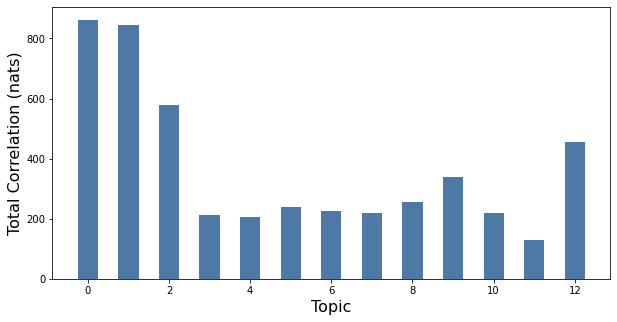

In [95]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs*1000, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

### PICKLE FOR MULTI BAR GRAPH

In [92]:
import pickle

In [97]:
list_800K_topic_dist = list(topic_model.tcs*1000)

In [99]:
with open('list_800K_topic_dist.pickle','wb') as to_write:
    pickle.dump(list_800K_topic_dist, to_write)

In [98]:
print(list_800K_topic_dist)

[861.7213617710426, 845.4307191742975, 578.0342793166978, 211.4805972565694, 206.10189124428973, 240.629582181948, 227.09025856230355, 218.9382111408219, 255.60187919674215, 340.00622371493677, 219.81811621831181, 129.464368990245, 455.0873480677108]


In [66]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [63]:
def top_tweets_word_cloud(topic_number,n_docs):
    top_tweets = topic_model.get_top_docs(topic=topic_number,n_docs=n_docs)
    top_tweet_list = []
    for each_tuple in top_tweets:
         top_tweet_list.append(phrases_800K_list[each_tuple[0]])
    top_tweet_string = " ".join(top_tweet_list)
    wordcloud_topic = WordCloud(collocations=False).generate(top_tweet_string)
    plt.imshow(wordcloud_topic, interpolation='bilinear')
    plt.axis("off")
    plt.show()

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


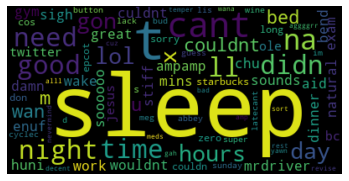

In [67]:
top_tweets_word_cloud(0,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


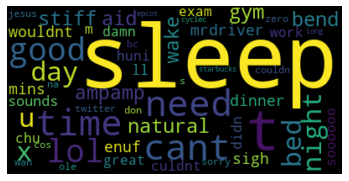

In [81]:
top_tweets_word_cloud(0,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


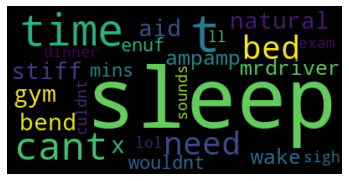

In [82]:
top_tweets_word_cloud(0,25)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


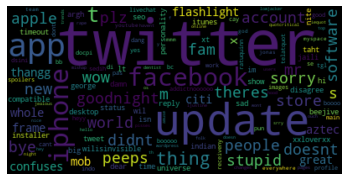

In [68]:
top_tweets_word_cloud(1,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


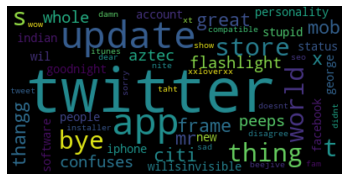

In [83]:
top_tweets_word_cloud(1,35)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


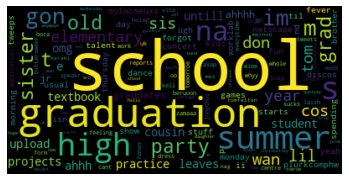

In [69]:
top_tweets_word_cloud(2,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


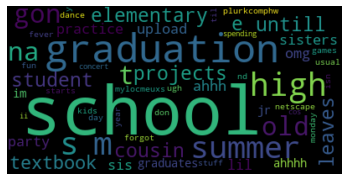

In [86]:
top_tweets_word_cloud(2,35)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


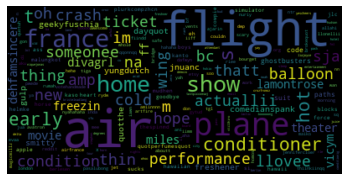

In [70]:
top_tweets_word_cloud(3,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


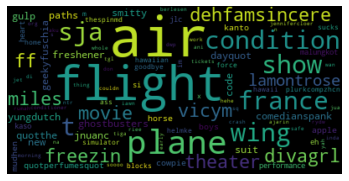

In [88]:
top_tweets_word_cloud(3,35)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


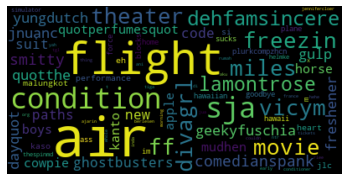

In [87]:
top_tweets_word_cloud(3,25)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


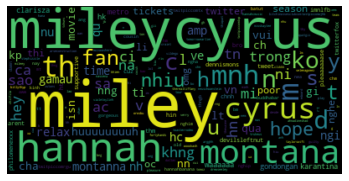

In [71]:
top_tweets_word_cloud(4,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


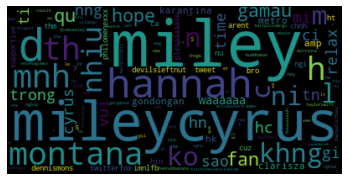

In [90]:
top_tweets_word_cloud(4,35)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


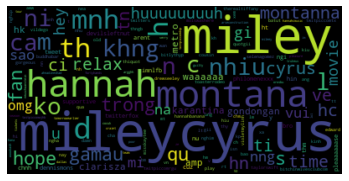

In [89]:
top_tweets_word_cloud(4,60)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


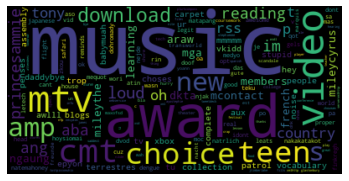

In [72]:
top_tweets_word_cloud(5,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


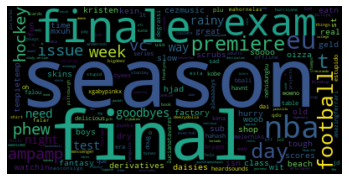

In [73]:
top_tweets_word_cloud(6,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


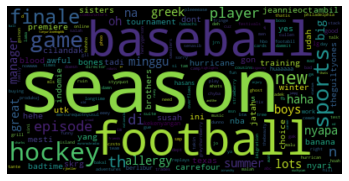

In [74]:
top_tweets_word_cloud(7,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


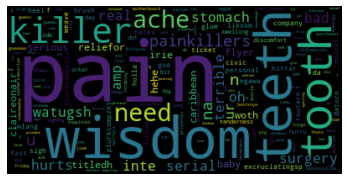

In [75]:
top_tweets_word_cloud(8,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


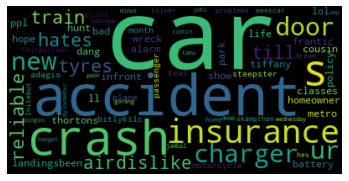

In [76]:
top_tweets_word_cloud(9,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


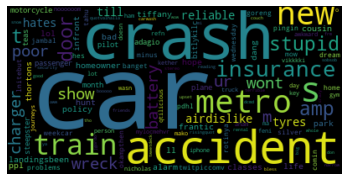

In [77]:
top_tweets_word_cloud(9,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


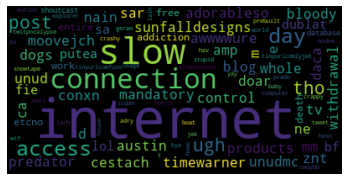

In [78]:
top_tweets_word_cloud(10,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


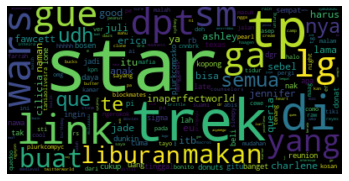

In [79]:
top_tweets_word_cloud(11,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


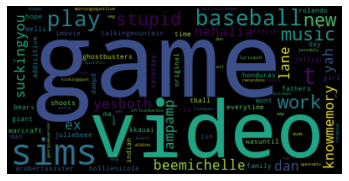

In [80]:
top_tweets_word_cloud(12,50)